# ***Telecom Churn Case Study***
---

## Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.


## Step 1: Importing and Understanding the Dataset
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn import metrics

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
main_df=pd.read_csv('/content/drive/MyDrive/Data Science/03-Machine Learning 2/09-Telecom Churn Case Study/train.csv')
main_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [ ]:
main_df.shape
print('This dataset has',main_df.shape[0], 'rows and',main_df.shape[1],'columns')

This dataset has 69999 rows and 172 columns


In [ ]:
# Importing the excel file of the dictionary.
data_dict=pd.read_excel('/content/drive/MyDrive/Data Science/03-Machine Learning 2/09-Telecom Churn Case Study/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [ ]:
main_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

* churn_probability is the Target veriable

## Step 2: Data Cleaning and Preparation
---

### Duplicate Rows Detection

In [ ]:
# Checking duplicate rows
row, column = main_df[main_df.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


### Remove Least Significant Columns

In [ ]:
def check_unique_values(dataframe):
    num = 0
    all_unique_values_columns = []
    one_unique_values_columns = []
    for col in dataframe.columns:
        unique_values = dataframe[col].nunique()
        #check if there is any column which has same value in all rows.
        if unique_values == 1:
            num += 1
            one_unique_values_columns.append(col)
        elif unique_values == len(dataframe):
            num += 1
            all_unique_values_columns.append(col)

    if num == 0:
        print("No columns have only one or all unique value")
    else:
       print('Column which has same value in all rows :', one_unique_values_columns)

    return one_unique_values_columns

def drop_all_unique_values_columns(df):
    not_useful_cols = check_unique_values(df)
    df.drop(columns=not_useful_cols, axis = 1, inplace = True)
    return df

Since these columns will not help in any model building, hence we can delete them.

In [ ]:
drop_all_unique_values_columns(main_df)
print("DataFrame Shape after removing unnecessary columns: \n", main_df.shape)

Column which has same value in all rows : ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
DataFrame Shape after removing unnecessary columns: 
 (69999, 159)


### Missing Value Handling

In [ ]:
def get_missing_info(dataframe):
    missing_df = pd.DataFrame(dataframe[dataframe.columns].isna().sum(), columns=["count_of_isna"])
    missing_df['na_percent'] = round(missing_df["count_of_isna"] / len(dataframe[dataframe.columns]) * 100, 2)
    return missing_df[missing_df["count_of_isna"] > 0].sort_values(by='count_of_isna', ascending=False)

In [ ]:
missing_df = get_missing_info(main_df)
missing_df

,count_of_isna,na_percent
count_rech_2g_6,52431,74.90
total_rech_data_6,52431,74.90
av_rech_amt_data_6,52431,74.90
arpu_3g_6,52431,74.90
max_rech_data_6,52431,74.90
arpu_2g_6,52431,74.90
night_pck_user_6,52431,74.90
count_rech_3g_6,52431,74.90
fb_user_6,52431,74.90
date_of_last_rech_data_6,52431,74.90


We can see there are many columns with more than 70% missing values. Let's analyze columns having Recharge infomation

In [ ]:
recharge_cols = list(missing_df.index[missing_df.index.astype(str).str.contains('rech')])
recharge_cols

['count_rech_2g_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_6',
 'total_rech_data_7',
 'count_rech_3g_7',
 'date_of_last_rech_data_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'date_of_last_rech_8',
 'date_of_last_rech_7',
 'date_of_last_rech_6']

In [ ]:
main_df.loc[:,recharge_cols].describe()

,count_rech_2g_6,total_rech_data_6,av_rech_amt_data_6,max_rech_data_6,count_rech_3g_6,total_rech_data_7,count_rech_3g_7,max_rech_data_7,count_rech_2g_7,av_rech_amt_data_7,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8
count,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17865.000000,17865.000000,17865.000000,17865.000000,17865.000000,18417.000000,18417.000000,18417.000000,18417.000000,18417.000000
mean,1.865323,2.467612,192.831096,126.500000,0.602288,2.679989,0.623678,126.402071,2.056311,201.455940,2.652441,125.374925,2.016018,0.636423,196.815792
std,2.566377,2.794610,190.623115,109.352573,1.279297,3.073472,1.401230,109.459266,2.799916,198.346141,3.101265,109.648799,2.728246,1.457058,192.280532
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,82.000000,25.000000,0.000000,1.000000,0.000000,25.000000,1.000000,92.000000,1.000000,25.000000,1.000000,0.000000,84.000000
50%,1.000000,1.000000,154.000000,145.000000,0.000000,2.000000,0.000000,145.000000,1.000000,154.000000,1.000000,145.000000,1.000000,0.000000,154.000000
75%,2.000000,3.000000,252.000000,177.000000,1.000000,3.000000,1.000000,177.000000,2.000000,252.000000,3.000000,179.000000,2.000000,1.000000,252.000000
max,42.000000,61.000000,5920.000000,1555.000000,29.000000,54.000000,34.000000,1555.000000,48.000000,4365.000000,60.000000,1555.000000,44.000000,45.000000,4076.000000


> In the recharge variables where minumum value is 1, we can impute missing values with 0 since it means customer didn't recharge in that month. Let's check.

Handling the missing values for the attributes `total_rech_data_*`, `max_rech_data_*`, `av_rech_amt_data_*`

In [ ]:
# lets look at the data for data recharge attributes.
# Conside the column date_of_last_rech_data indicating the date of the last recharge made in any given month for mobile internet.
main_df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6', 'av_rech_amt_data_6']].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,6/25/2014,7.0,25.0,175.0


> The column`total_rech_data` and the `max_rech_data` and the `av_rech_amt_data` also has missing values, the missing values in all the columns mentioned can be considered as meaningful missing as customer has not done any recharge for mobile interenet (i.e. date_of_last_rech_data is NaN).We can impute 0 as their values.<br>


In [ ]:
# Identify and Replace np.nan values with 0.0 for columns whose names start with 'total_rech_data_'
total_rech_data_columns = [col for col in main_df.columns if col.startswith('total_rech_data_')]
main_df[total_rech_data_columns] = main_df[total_rech_data_columns].fillna(0.0)

# Identify and Replace np.nan values with 0.0 for columns whose names start with 'max_rech_data_'
max_rech_data_columns = [col for col in main_df.columns if col.startswith('max_rech_data_')]
main_df[max_rech_data_columns] = main_df[max_rech_data_columns].fillna(0.0)

# Identify and Replace np.nan values with 0.0 for columns whose names start with 'av_rech_amt_data_'
av_rech_amt_data_columns = [col for col in main_df.columns if col.startswith('av_rech_amt_data_')]
main_df[av_rech_amt_data_columns] = main_df[av_rech_amt_data_columns].fillna(0.0)

Handling the missing values for the attributes `count_rech_2g_*`,`count_rech_3g_*`

In [ ]:
# Checking the related columns values
selected_rows = main_df[['count_rech_2g_6', 'count_rech_3g_6', 'total_rech_data_6']]
selected_rows.head()

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,NaN,NaN,0.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,7.0,0.0,7.0


> We can see that `total_rech_data` = `count_rech_2g` + `count_rech_3g` for each month, which derives to a multicollinearity issue. In order to reduce the multicollinearity, we can drop the columns `count_rech_2g` and `count_rech_3g` for each month from 6 to 9 respectively.

In [ ]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*'
count_rech_2g_columns = [col for col in main_df.columns if col.startswith('count_rech_2g_')]
count_rech_3g_columns = [col for col in main_df.columns if col.startswith('count_rech_3g_')]
main_df.drop(count_rech_2g_columns + count_rech_3g_columns, axis=1, inplace=True)

Dropping the columns related to date from the dataset

>The `date_of_last_rech_data_` has no value after the imputation of columns `total_rech_data_*`,`max_rech_data_*` are completes. Also the missing value percentage is high for these columns and can be dropped from the dataset.

> As we can no more utilise the date column, we can drop the `date_of_last_rech_*` column corresponding to months 6,7,8 and 9 respectively.

In [ ]:
# Dropping the columns related to date from the dataset
date_columns = [col for col in main_df.columns if col.startswith('date_')]
main_df.drop(date_columns, axis=1, inplace=True)

### Imputing categorical values
Replace NaN values in categorical variables

In [ ]:
numerical_cat_cols = []
missing_df = get_missing_info(main_df)
for var in missing_df.index:
    unique_values_count = main_df[var].nunique()

    if unique_values_count < 40:
       numerical_cat_cols.append(var)
       print("Unique values in {0}  : {1}".format(var, str(main_df[var].unique())),'\n')
print("Numerical discrete features:",numerical_cat_cols)

Unique values in fb_user_6  : [nan  1.  0.] 

Unique values in night_pck_user_6  : [nan  0.  1.] 

Unique values in fb_user_7  : [nan  1.  0.] 

Unique values in night_pck_user_7  : [nan  0.  1.] 

Unique values in fb_user_8  : [nan  1.  0.] 

Unique values in night_pck_user_8  : [nan  0.  1.] 

Numerical discrete features: ['fb_user_6', 'night_pck_user_6', 'fb_user_7', 'night_pck_user_7', 'fb_user_8', 'night_pck_user_8']


>We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [ ]:
main_df[numerical_cat_cols].fillna(-1, inplace=True)

Handling the other attributes with higher missing value percentage

In [ ]:
missing_df = get_missing_info(main_df)
missing_df

,count_of_isna,na_percent
arpu_3g_6,52431,74.90
fb_user_6,52431,74.90
arpu_2g_6,52431,74.90
night_pck_user_6,52431,74.90
arpu_2g_7,52134,74.48
fb_user_7,52134,74.48
arpu_3g_7,52134,74.48
night_pck_user_7,52134,74.48
arpu_2g_8,51582,73.69
arpu_3g_8,51582,73.69


In [ ]:
# List the columns having more than 70% missing values
high_missing_value_cols = list(missing_df.index[missing_df['na_percent'] > 70])
high_missing_value_cols

['arpu_3g_6',
 'fb_user_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'arpu_2g_7',
 'fb_user_7',
 'arpu_3g_7',
 'night_pck_user_7',
 'arpu_2g_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8']

In [ ]:
# Delete the columns having more than 70% missing values
main_df.drop(high_missing_value_cols, axis=1, inplace=True)
print("DataFrame Shape after removing high missing value columns: \n", main_df.shape)

DataFrame Shape after removing high missing value columns: 
 (69999, 135)


In [ ]:
missing_df = get_missing_info(main_df)
missing_df

,count_of_isna,na_percent
ic_others_8,3703,5.29
loc_og_t2m_mou_8,3703,5.29
std_og_mou_8,3703,5.29
spl_og_mou_8,3703,5.29
std_og_t2f_mou_8,3703,5.29
og_others_8,3703,5.29
std_og_t2m_mou_8,3703,5.29
loc_ic_t2t_mou_8,3703,5.29
std_og_t2t_mou_8,3703,5.29
loc_ic_t2m_mou_8,3703,5.29


> There is no missing value in recharge features

### Deriving New Features

#### Filtering the High Value Customer from Good Phase


**In churn prediction, we assume that there are three phases of customer lifecycle :**
- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]

**Define high-value customers as follows:**

 Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [ ]:
# calculate the total data recharge amount for June and July --> average recharge amount  *  number of recharges
main_df['total_rech_amt_data_6'] = main_df['av_rech_amt_data_6'] * main_df['total_rech_data_6']
main_df['total_rech_amt_data_7'] = main_df['av_rech_amt_data_7'] * main_df['total_rech_data_7']

In [ ]:
# calculate total recharge amount for June and July --> data recharge amount + call recharge amount
main_df['overall_rech_amt_6'] = main_df['total_rech_amt_data_6'] + main_df['total_rech_amt_6']
main_df['overall_rech_amt_7'] = main_df['total_rech_amt_data_7'] + main_df['total_rech_amt_7']

In [ ]:
# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
main_df['avg_rech_amt_6_7'] = (main_df['overall_rech_amt_6'] + main_df['overall_rech_amt_7'])/2

In [ ]:
# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = main_df['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")


The 70th quantile value to determine the High Value Customer is:  477.5 



In [ ]:
# Filtering the data to the top 30% considered as High Value Customer
hvc_df = main_df[main_df['avg_rech_amt_6_7'] >= cut_off]
hvc_df.reset_index(drop=True, inplace=True)
print('This High Value Customer dataset has',hvc_df.shape[0], 'rows and',hvc_df.shape[1],'columns')

This High Value Customer dataset has 21013 rows and 140 columns


The total number of customers is now limited to ~21k who lies under the High Value customer criteria based upon which the model is built.

Let us check the missing values percentages again for the HVC group

In [ ]:
missing_df = get_missing_info(hvc_df)
missing_df

,count_of_isna,na_percent
ic_others_8,822,3.91
loc_og_t2m_mou_8,822,3.91
std_og_mou_8,822,3.91
spl_og_mou_8,822,3.91
std_og_t2f_mou_8,822,3.91
og_others_8,822,3.91
std_og_t2m_mou_8,822,3.91
loc_ic_t2t_mou_8,822,3.91
std_og_t2t_mou_8,822,3.91
loc_ic_t2m_mou_8,822,3.91


### Imputting Numerical Columns using KNNImputer
The remaining attributes with missing value can be imputed using the advanced imputation technique like KNNImputer

> Now we can see that our dataset is free from missing values.

In [ ]:
# Numerical columns available
num_col = hvc_df.select_dtypes(include = ['int64','float64']).columns.tolist()
num_col

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

In [ ]:
num_col.remove('churn_probability')
print(len(num_col))

139


In [ ]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
hvc_df[num_col]=scalar.fit_transform(hvc_df[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

hvc_df_knn = pd.DataFrame(knn.fit_transform(hvc_df[num_col]))
hvc_df_knn.columns=hvc_df[num_col].columns

In [ ]:
# check for any null values after imputation for numerical columns
missing_df = get_missing_info(hvc_df_knn)
missing_df

,count_of_isna,na_percent


In [ ]:
# After scaling the numerical columns to manage null values,
# It's now possible to revert the scaled values back to their original form.
# This involves converting the scaled data back to its original representation.
hvc_df[num_col]=scalar.inverse_transform(hvc_df_knn)
hvc_df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,4.0,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13.0,10.0,8.0,290.0,136.0,122.0,50.0,41.0,30.0,25.0,10.0,30.0,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.0,0.0,0.0,7.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,647.0,0.0,0.00,0.00,0,1225.0,1337.0,1515.0,1473.0,1494.0
1,15.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5.0,3.0,4.0,654.0,400.0,652.0,250.0,250.0,250.0,0.0,150.0,250.0,1.0,0.0,1.0,154.0,0.0,154.0,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,602.0,0.0,0.00,0.00,0,154.0,0.0,808.0,400.0,604.0
2,23.0,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
# Final check for missing values if any
hvc_df.isnull().sum().sum()

0

### Dropping Skewed Columns

In [ ]:
skewed_cols = []
for each in hvc_df.columns:
    if max(hvc_df[each].value_counts(normalize=True)*100) > 95:
        skewed_cols.append(each)

print(skewed_cols)

['og_others_7', 'og_others_8']


In [ ]:
hvc_df.drop(skewed_cols, axis=1, inplace=True)

## Step 3: Exploratory Data Analysis
---

### Analysing target variable `churn_probability`

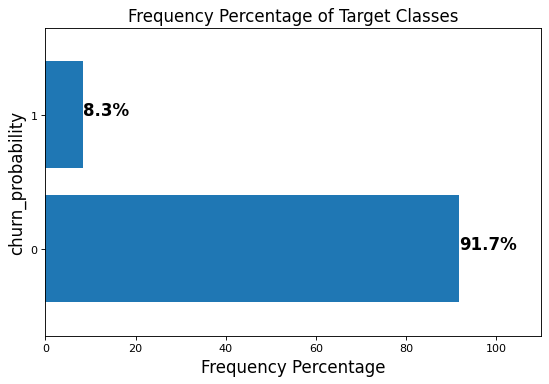

In [ ]:
plt.figure(dpi=80)

# Plot frequency percentages barplot
hvc_df['churn_probability'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = hvc_df['churn_probability'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('churn_probability', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()

As we can see that 91% of the customers do not churn, there is a possibility of class imbalance

In [ ]:
# change data type to category
hvc_df.churn_probability = hvc_df.churn_probability.astype("category")

In [ ]:
def plot_bar_graph(title, month, y_list, data):
    """
    Plot bar graphs for given data.

    Parameters:
    - title (str): Title of the plot.
    - month (list of str): List of month names.
    - y_list (list of str): List of y-variable names corresponding to each month.
    - data (DataFrame): DataFrame containing the data to be plotted.

    Returns:
    - None

    This function plots bar graphs for each month's data based on the provided y-variables.
    It creates subplots for each month, with the corresponding y-variable plotted against 'churn_probability'.
    The title of each subplot includes the specified title along with the month name.
    """
    plt.figure(figsize=(15, 10))
    churn_colors = {0: 'green', 1: 'red'}
    for i, m in enumerate(month):
        plt.subplot(2, 3, i+1)
        plt.title(f'{title} for {m}')
        sns.barplot(x='churn_probability', y=y_list[i], hue='churn_probability', data=data, palette=churn_colors)

    plt.tight_layout()
    plt.show()

In [ ]:
hvc_df[['arpu_6', 'arpu_7', 'arpu_8']]

,arpu_6,arpu_7,arpu_8
0,240.708,128.191,101.565
1,580.549,377.294,338.286
2,1130.948,905.506,479.762
3,371.974,352.069,240.449
4,390.489,350.985,421.300
...,...,...,...
21008,1106.130,1609.381,1686.392
21009,196.695,298.645,192.440
21010,235.524,195.633,129.598
21011,15.760,410.924,329.136


### Analyzing Average Revenue per user

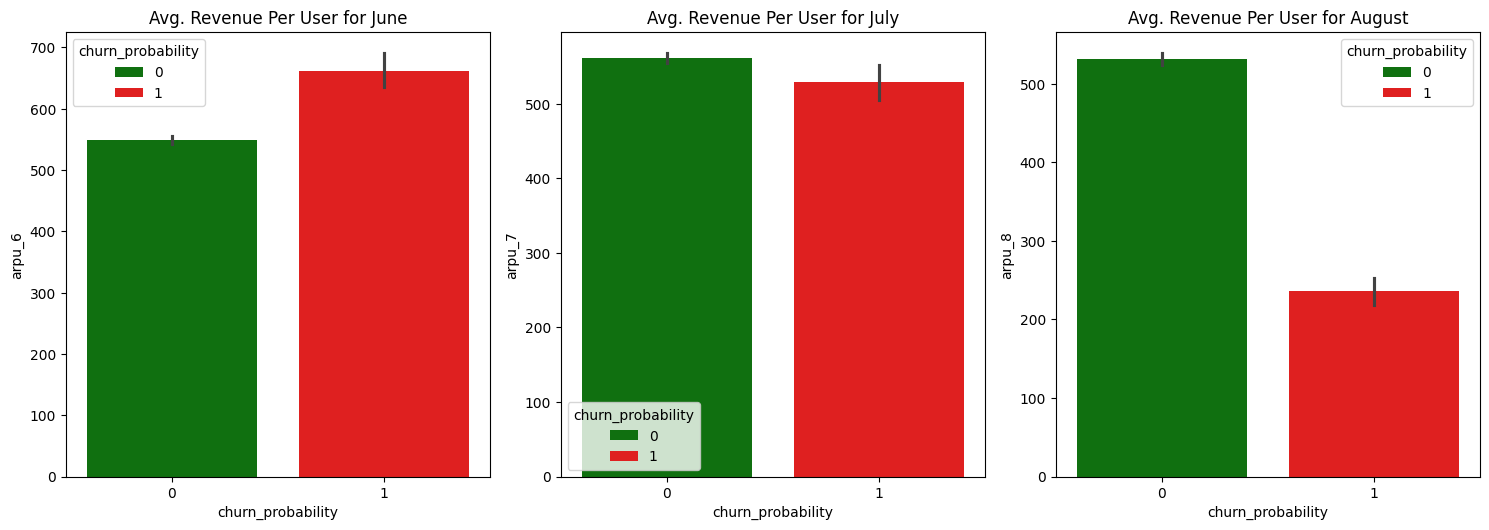

In [ ]:
# Visualising Average Revenue per user
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8']
plot_bar_graph('Avg. Revenue Per User', ['June', 'July', 'August'], arpu_cols, hvc_df)

> The decline in the Average Revenue Per User (ARPU) in month of August suggests churn.

### Analyzing Outgoing minutes of usage vs Target

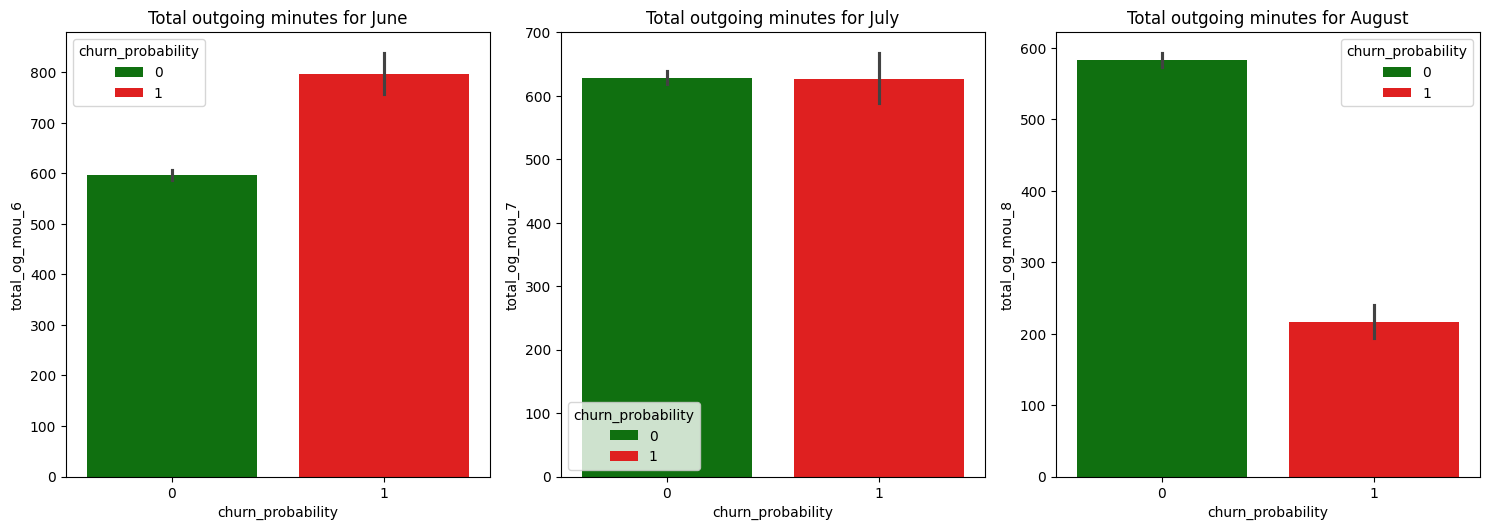

In [ ]:
# Visualising Outgoing minutes of usage
total_og_mou_cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
plot_bar_graph('Total outgoing minutes', ['June', 'July', 'August'], total_og_mou_cols, hvc_df)

> The decline in the Total outgoing minutes in month of August suggests churn.

### Analyzing incoming minutes of usage vs Target

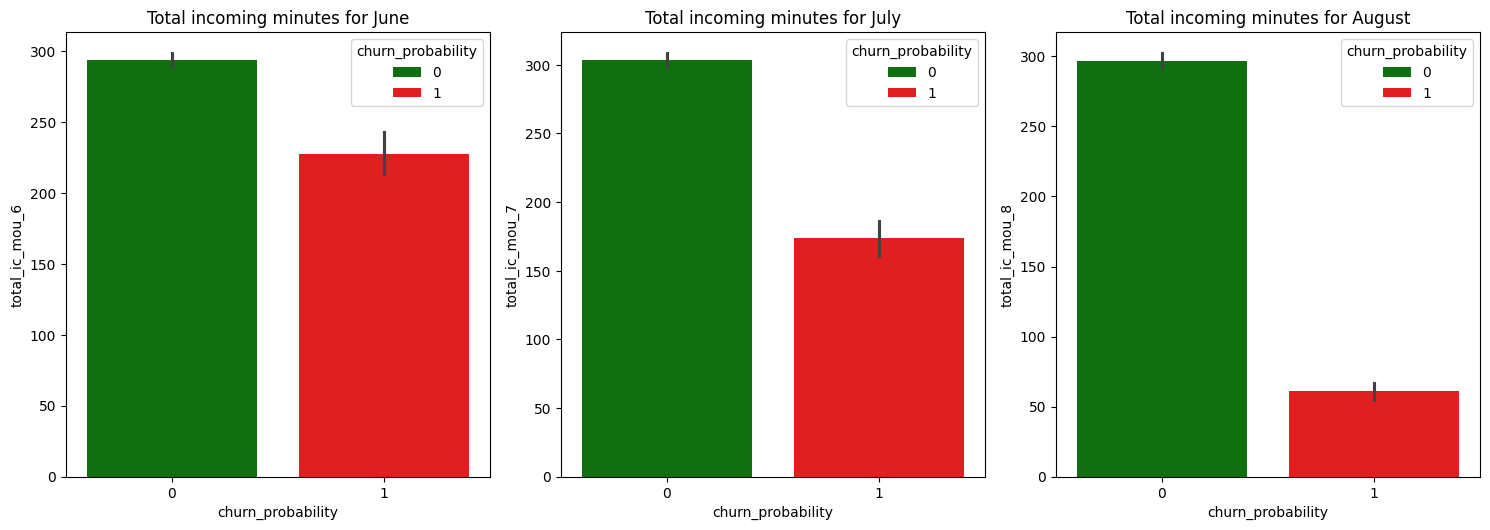

In [ ]:
# Visualising incoming minutes of usage
total_ic_mou_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
plot_bar_graph('Total incoming minutes', ['June', 'July', 'August'], total_ic_mou_cols, hvc_df)

> The decline in the Total incoming minutes in month of August suggests churn.

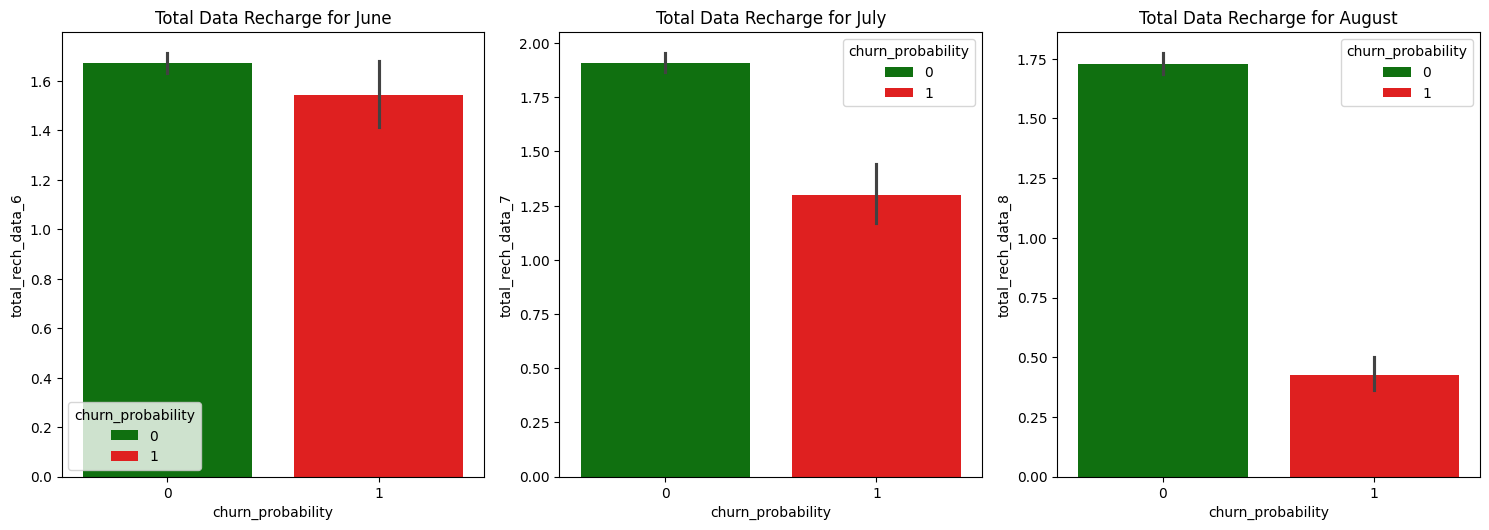

In [ ]:
# Visualising total_rech_data
total_rech_data_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']
plot_bar_graph('Total Data Recharge', ['June', 'July', 'August'], total_rech_data_cols, hvc_df)

> The decline in the data recharge in month of August suggests churn.

### **Analyzing AON (age of network)**

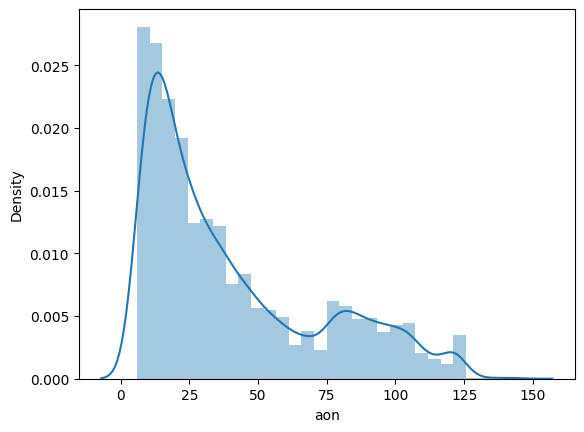

In [ ]:
# We have a column called 'aon'. we can derive new variables from this to explain the data w.r.t churn.
hvc_df['aon'] = (hvc_df['aon']/30).round(0)
# Checking the distribution of he aon variable
sns.distplot(hvc_df['aon'],bins=30)
plt.show()

In [ ]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
hvc_df['aon_range'] = pd.cut(hvc_df['aon'], tn_range, labels=tn_label)
hvc_df['aon_range'].head()

0    1-2 Yrs
1    1-2 Yrs
2    1-2 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: aon_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

In [ ]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,hvc_df['churn_probability'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,hvc_df['churn_probability'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,4))
    plt.xticks(rotation=360)
    labels=["0","1"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="churn_probability",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.show()

churn_probability      0     1    All
aon_range                            
0-6 Months           306    56    362
6-12 Months         3102   419   3521
1-2 Yrs             4879   548   5427
2-5 Yrs             6110   522   6632
5 Yrs and above       72     3     75
All                14469  1548  16017
------------------------------------------------------------------------------------------------------------------------


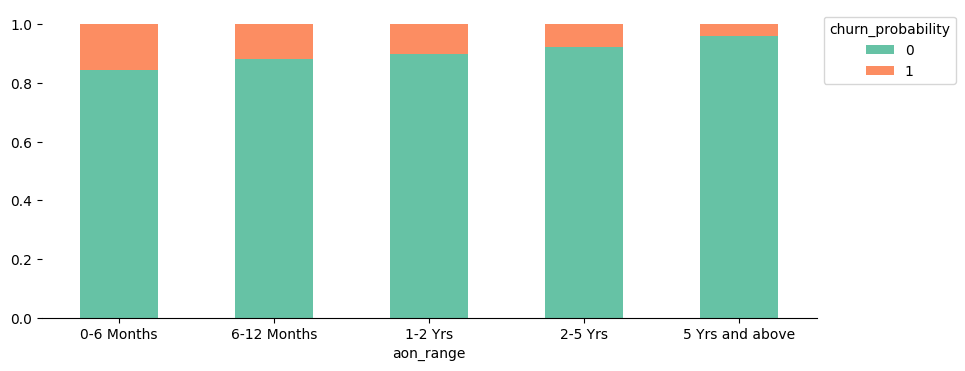

In [ ]:
stacked_plot(hvc_df['aon_range'])

> It can be seen that the maximum churn rate happens within 12 months, but it gradually decreases as the customer retains in the network.

### Check Corelation

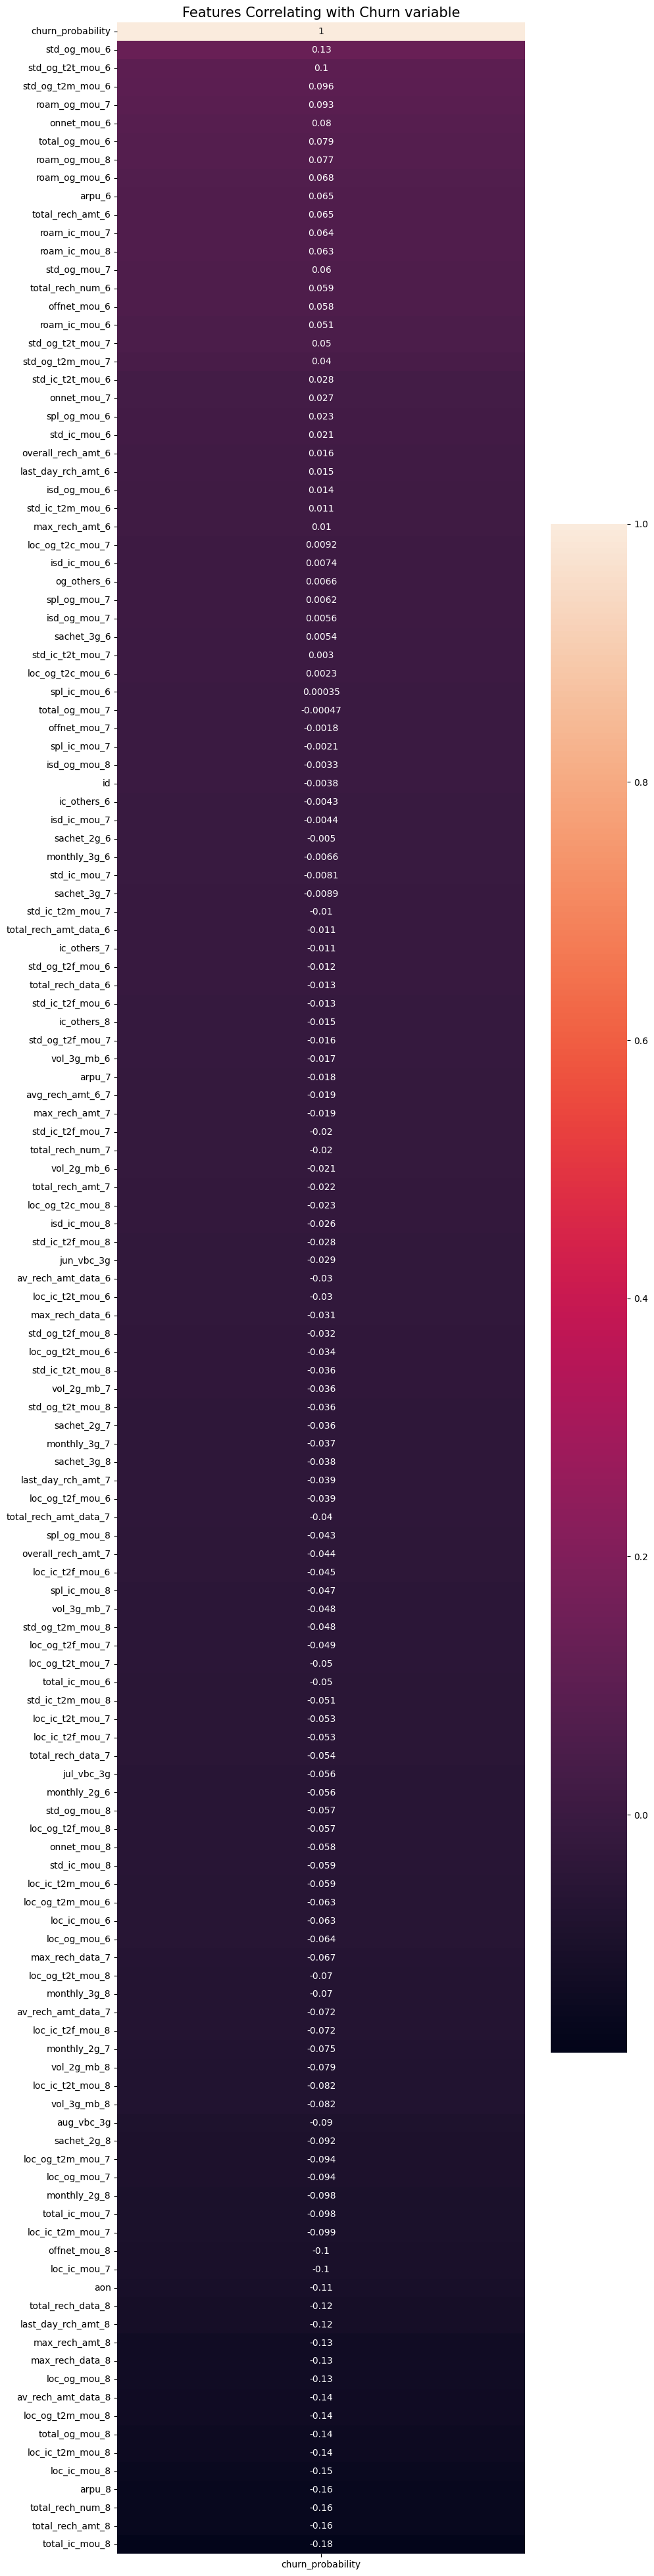

In [ ]:
# Convert 'churn_probability' to numeric representation (for example, label encoding)
hvc_df['churn_probability'] = hvc_df['churn_probability'].astype('category').cat.codes

plt.figure(figsize=(10, 50))
heatmap_churn = sns.heatmap(hvc_df.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'), annot=True)
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)
plt.show()

In [ ]:
# Dropping unwanted columns
hvc_df.drop(['aon_range'], axis=1, inplace=True)

As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [ ]:
hvc_df.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                 'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [ ]:
hvc_df.shape

(21013, 130)

## Step 4: Model Building and Evaluation

### Train-Test Split

In [ ]:
# Partitioning the dataset into the feature variable 'X' and the response variable 'y'.
X = hvc_df.drop(['churn_probability', 'id'], axis=1)
y = hvc_df['churn_probability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (14709, 128)
Dimension of X_test: (6304, 128)


Let's see the proportion of each class across both the training and test sets:

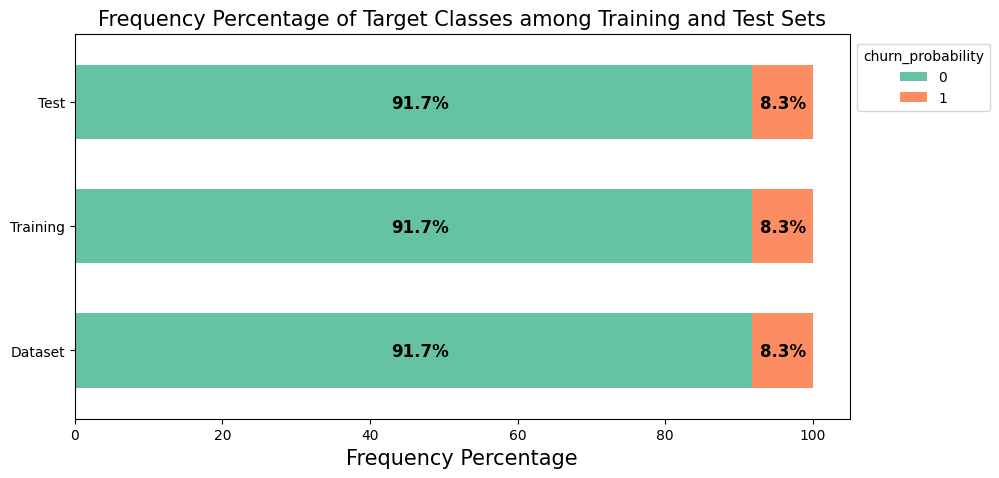

In [ ]:
# Define a dataframe containing frequency percentages
df_perc = pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                     y_train.value_counts(normalize=True).mul(100).round(1),
                     y_test.value_counts(normalize=True).mul(100).round(1)], axis=1)
df_perc.columns=['Dataset','Training','Test']
df_perc = df_perc.T

# Plot frequency percentages barplot
df_perc.plot(kind='barh', stacked=True, figsize=(10,5), width=0.6)

# Add the percentages to our plot
for idx, val in enumerate([*df_perc.index.values]):
    for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
        plt.text(x=(y_location - percentage) + (percentage / 2)-3,
                 y=idx - 0.05,
                 s=f'{percentage}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(title='churn_probability', loc=(1.01,0.8))
plt.xlabel('Frequency Percentage', fontsize=15)
plt.title('Frequency Percentage of Target Classes among Training and Test Sets', fontsize=15)
plt.show()

As seen, the samples are randomly divided in such a way that the proportion of each class remains the same across both the training and test sets.

### Common Utility Methods

In [ ]:
def tune_hyperparameters(clf, param_grid, X_train, y_train):
    '''
    This function optimize the hyperparameters for a classifier by searching over a specified hyperparameter grid. It uses
    GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters, and selects
    the combination with the highest f1-score. The function returns the best classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

In [ ]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports,
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), dpi=100, gridspec_kw={'width_ratios': [2, 2, 2]})

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.8, 3)
    table.set_fontsize(15)
    ax2.axis('tight')
    ax2.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
          cell.set_color('royalblue')
          cell.set_text_props(fontweight='bold')  # Make heading bold

    # Plot ROC curve for test data and display AUC score
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax3)
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('True Positive Rate')
    ax3.set_title('ROC Curve for Test Data (Positive label: 1)')

    plt.tight_layout()
    plt.show()

In [ ]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

### Model 1. Logistic Regression with RFE and SMOTE

**Data Imbalance Handling**

Since we have only 8 % (approx.) data as churned one, its an imbalanced dataset and to balance that we will use SMOTE
(Synthetic Minority Over-sampling Technique).

In [ ]:
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
9702,302.638,294.887,472.134,34.04,41.21,46.11,232.48,181.89,372.76,1.66,0.00,56.48,0.0,0.00,54.98,34.04,16.61,21.11,66.68,88.14,146.43,4.11,0.00,0.00,0.00,7.95,0.00,104.84,104.76,167.54,0.00,24.60,6.34,158.74,85.41,189.99,0.00,0.00,0.00,158.74,110.01,196.34,0.0,0.0,0.0,2.93,8.33,0.00,0.0,266.53,223.11,363.89,22.66,12.54,24.16,85.53,79.98,117.78,0.00,0.00,0.00,108.19,92.53,141.94,0.00,3.69,0.00,116.64,259.66,403.66,0.00,0.00,0.00,116.64,263.36,403.66,248.14,359.93,545.61,0.00,0.0,0.0,23.30,4.03,0.00,0.00,0.00,0.00,11.0,14.0,21.0,669.0,67.0,120.0,130.0,25.0,25.0,0.0,12.0,25.0,25.0,25.0,300.0,38.87,92.37,64.15,246.74,265.66,309.28,0.0,0.0,0.0,8.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,355.97,383.03,280.20,1767.0,3937.0,2852.0
15044,365.861,266.217,356.081,20.69,32.44,8.59,55.94,39.83,86.66,0.00,0.00,0.00,0.0,0.00,0.00,20.69,32.44,8.59,29.48,39.83,73.09,0.23,0.00,0.00,7.75,0.00,0.00,50.41,72.28,81.69,0.00,0.00,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.0,0.0,0.0,26.44,1.46,15.04,0.0,77.09,73.74,96.74,226.83,135.48,14.28,298.59,140.76,103.33,5.88,16.53,25.89,531.31,292.78,143.51,0.00,0.00,0.00,3.08,1.28,0.33,2.31,0.06,1.25,5.39,1.34,1.58,537.59,294.31,145.79,0.11,0.0,0.0,0.00,0.05,0.69,0.76,0.13,0.00,8.0,10.0,7.0,402.0,152.0,125.0,154.0,125.0,20.0,154.0,2.0,152.0,125.0,154.0,279.0,6.97,35.34,214.05,1092.21,1531.26,1003.02,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,972.56,1046.44,298.11,1695.0,422.0,1058.5
892,343.764,332.817,114.357,2.31,1.34,6.03,118.21,135.53,139.24,0.00,0.00,0.00,0.0,0.00,0.00,2.31,1.34,3.98,108.23,99.76,110.06,5.65,34.98,25.83,0.00,0.00,0.00,116.19,136.09,139.88,0.00,0.00,0.00,0.00,0.00,5.39,4.33,0.78,0.00,4.33,0.78,5.39,0.0,0.0,0.0,0.00,0.00,0.00,0.0,120.53,136.88,145.28,1.64,0.53,1.14,69.14,72.64,86.51,2.53,1.01,7.99,73.33,74.19,95.66,0.11,0.00,0.00,2.91,0.00,4.11,3.00,0.00,0.00,6.03,0.00,4.11,79.36,74.19,99.89,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.11,5.0,5.0,2.0,369.0,252.0,252.0,349.0,252.0,252.0,349.0,0.0,252.0,252.0,0.0,0.0,43.09,95.89,0.00,1319.36,958.24,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,62.0,416.61,931.98,1283.91,504.0,774.0,639.0
18789

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (26984, 128)
Dimension of y_train_sm Shape: (26984,)


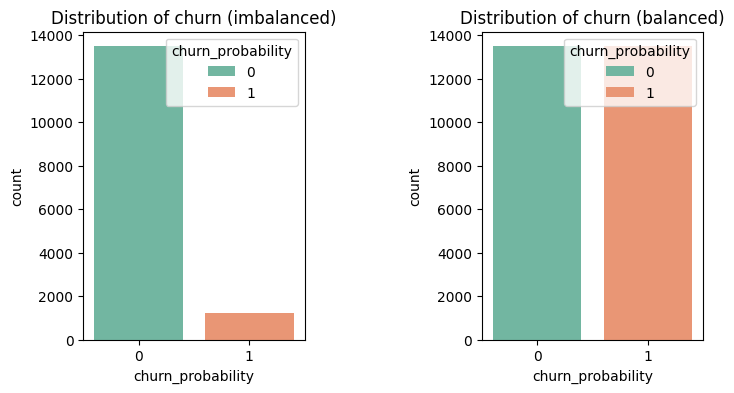

In [ ]:
# Checking the distribution on our target variable 'y_train' before and after SMOTE
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.title("Distribution of churn (imbalanced)")
sns.countplot(x=y_train, hue=y_train)

plt.subplot(1,2,2)
plt.title("Distribution of churn (balanced)")
sns.countplot(x=y_train_sm, hue=y_train_sm)

plt.subplots_adjust(wspace=0.8)
plt.show()

In [ ]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns
X_train_sm[num_cols] = scaler.fit_transform(X_train_sm[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
# Select top 20 features using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train_sm, y_train_sm)

In [ ]:
# Selected features using RFE
selected_features = X_train_sm.columns[rfe.support_]
selected_features

Index(['onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'monthly_2g_8'],
      dtype='object')

In [ ]:
X_train_sm = X_train_sm[selected_features]
X_test = X_test[selected_features]
logreg.fit(X_train_sm, y_train_sm)

LogisticRegression()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     13492
           1       0.83      0.85      0.84     13492

    accuracy                           0.84     26984
   macro avg       0.84      0.84      0.84     26984
weighted avg       0.84      0.84      0.84     26984


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      5782
           1       0.30      0.83      0.44       522

    accuracy                           0.82      6304
   macro avg       0.64      0.83      0.67      6304
weighted avg       0.93      0.82      0.86      6304



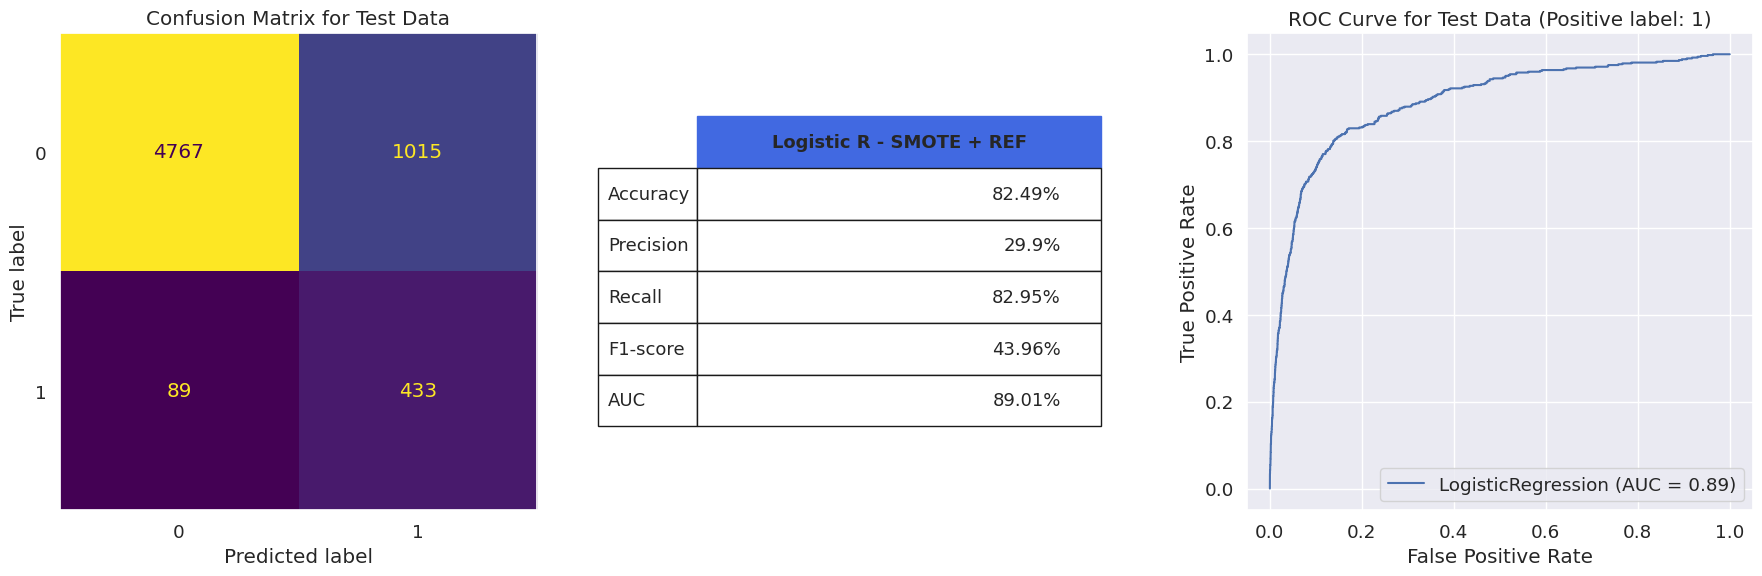

In [ ]:
model_evaluation(logreg, X_train_sm, X_test, y_train_sm, y_test, 'Logistic R - SMOTE + REF')

In [ ]:
# Save the final performance of Logistic Regression classifier
logreg_rfe_smote_result = metrics_calculator(logreg, X_test, y_test, 'Logistic Regression - RFE + SMOTE')

### Model 2. Logistic Regression with PCA and SMOTE

In [ ]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

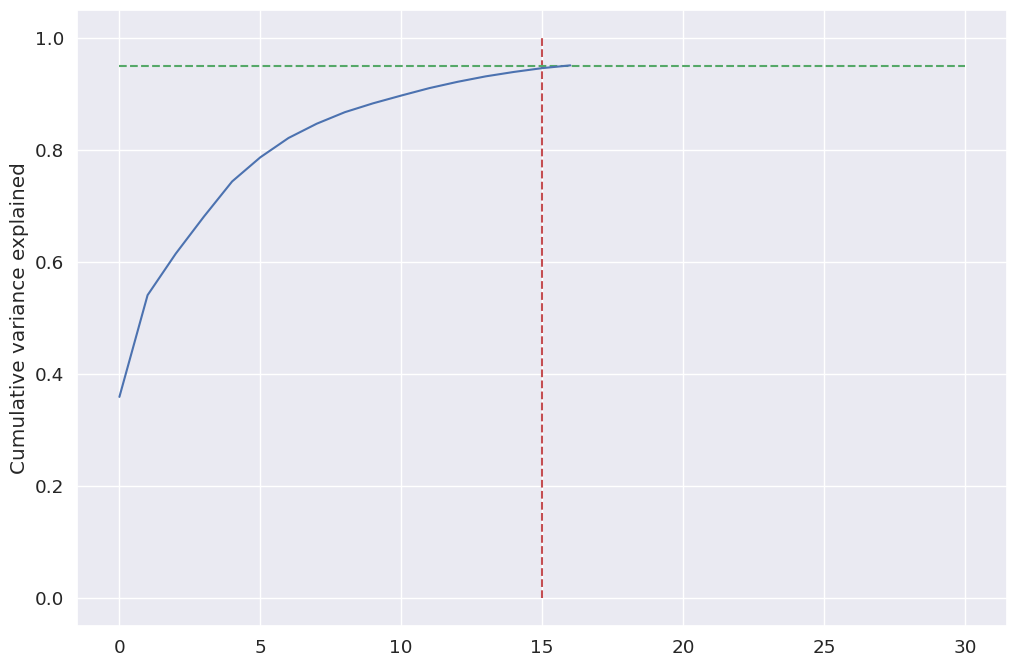

In [ ]:
pca = PCA(0.95)
pca.fit(X_train)
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=15)
smote = SMOTE(random_state=2)
lr = LogisticRegression()

In [ ]:
pipe = make_pipeline(
    smote,
    scaler,
    pca,
    lr
)

# Define hyperparameters grid for GridSearchCV
params = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'saga'],
}

# Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipe, params, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
lr_best_params = grid_search.best_params_
print(lr_best_params)
lr_pca_model = grid_search.best_estimator_
print(lr_pca_model)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'logisticregression__C': 0.1, 'logisticregression__solver': 'saga'}
Pipeline(steps=[('smote', SMOTE(random_state=2)),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=15)),
                ('logisticregression',
                 LogisticRegression(C=0.1, solver='saga'))])



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     13492
           1       0.25      0.79      0.38      1217

    accuracy                           0.79     14709
   macro avg       0.62      0.79      0.63     14709
weighted avg       0.92      0.79      0.83     14709


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      5782
           1       0.25      0.79      0.37       522

    accuracy                           0.78      6304
   macro avg       0.61      0.78      0.62      6304
weighted avg       0.92      0.78      0.83      6304



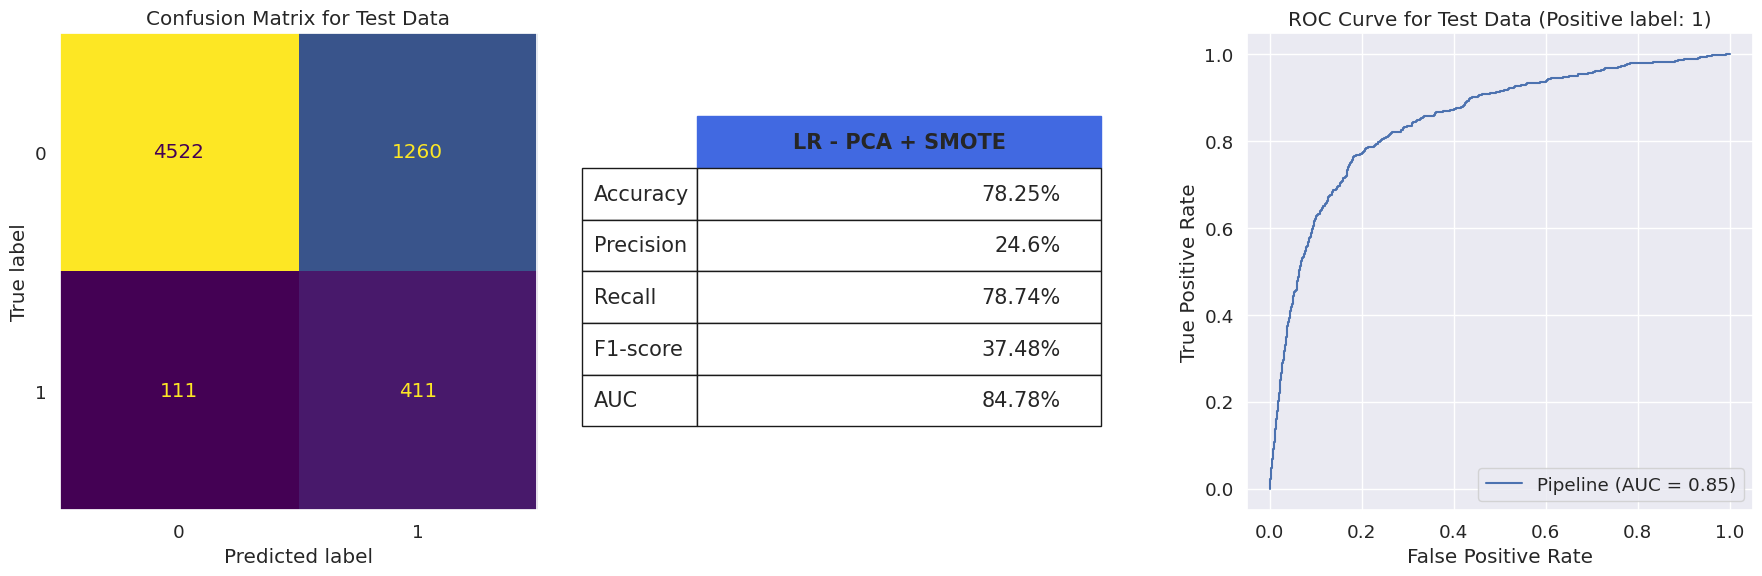

In [ ]:
model_evaluation(lr_pca_model, X_train, X_test, y_train, y_test, 'LR - PCA + SMOTE')

In [ ]:
# Save the final performance of Logistic Regression classifier
logreg_pca_smote_result = metrics_calculator(lr_pca_model, X_test, y_test, 'Logistic Regression - PCA + SMOTE')

### Model 3. Logistic Regression with Class Weights Hyperparameter Tuning

In [ ]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,20)]

# Define hyperparameters grid
param_grid = {
    'C': np.logspace(-5, 5, 10),
    'class_weight': class_weights,

}
# Define the base model
logreg = LogisticRegression(random_state = 13)

# Call tune_hyperparameters function to find the optimal combination of hyperparameters
logreg_cw_final = tune_hyperparameters(logreg, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 100000.0, 'class_weight': {0: 0.4212105263157895, 1: 0.5787894736842105}}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     13492
           1       0.69      0.43      0.53      1217

    accuracy                           0.94     14709
   macro avg       0.82      0.71      0.75     14709
weighted avg       0.93      0.94      0.93     14709


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5782
           1       0.62      0.38      0.47       522

    accuracy                           0.93      6304
   macro avg       0.78      0.68      0.72      6304
weighted avg       0.92      0.93      0.92      6304



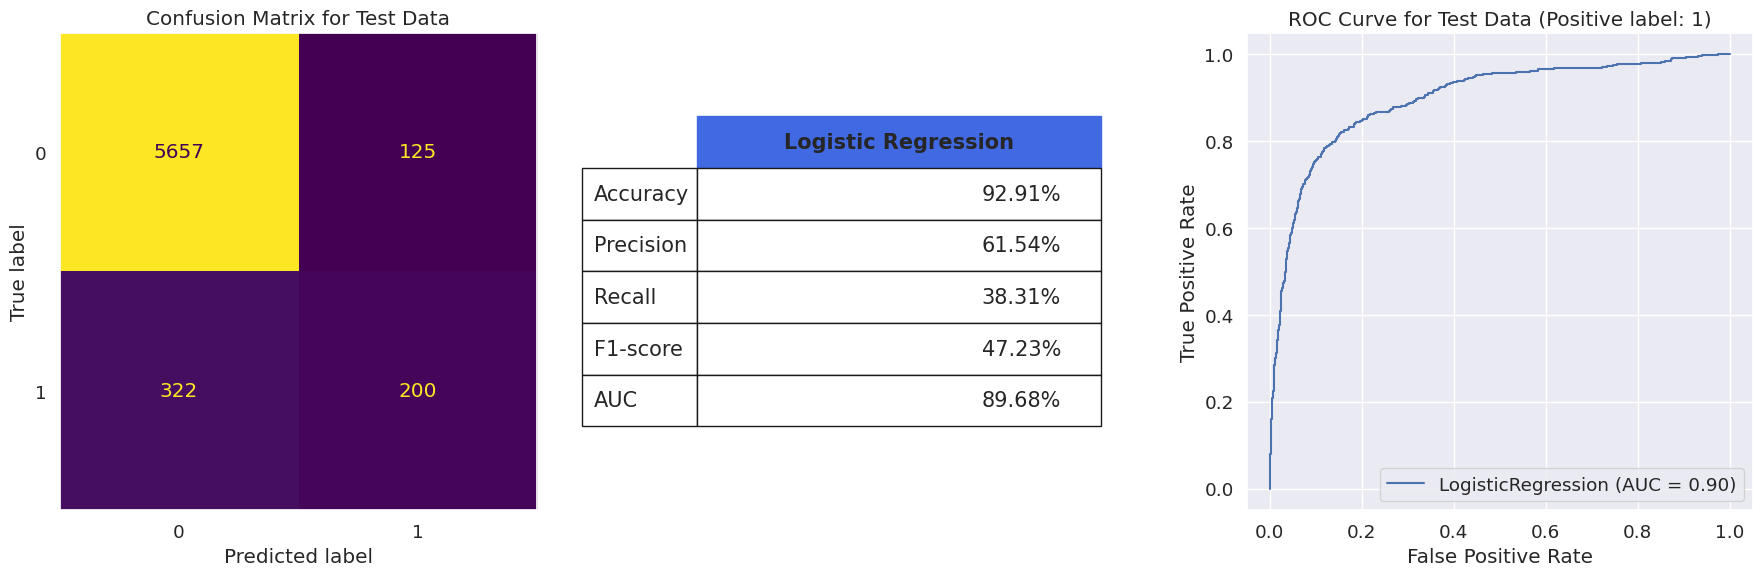

In [ ]:
model_evaluation(logreg_cw_final, X_train, X_test, y_train, y_test, 'Logistic Regression')

In [ ]:
# Save the final performance of Logistic Regression classifier
logreg_cw_result = metrics_calculator(logreg_cw_final, X_test, y_test, 'Logistic Regression - Class Weights')

### Model 4. Random Forest Classifier

In [ ]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': np.arange(5, 12),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'class_weight': class_weights
}

# Create a random forest classifier object
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
#rf_opt = tune_hyperparameters(rf, param_grid, X_train, y_train)

In [ ]:
# Build random forest classifier object considering the obtained optimal values for hyperparameters
rf_final = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True,  n_estimators=100,
                                  max_depth = 10,  min_samples_leaf=4, min_samples_split=6,
                                  class_weight={0: 0.30, 1: 0.70}, random_state=0)


# Train the final Random Forest model
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=10,
                       max_features=None, min_samples_leaf=4,
                       min_samples_split=6, random_state=0)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     13492
           1       0.84      0.81      0.83      1217

    accuracy                           0.97     14709
   macro avg       0.91      0.90      0.91     14709
weighted avg       0.97      0.97      0.97     14709


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5782
           1       0.66      0.55      0.60       522

    accuracy                           0.94      6304
   macro avg       0.81      0.76      0.78      6304
weighted avg       0.94      0.94      0.94      6304



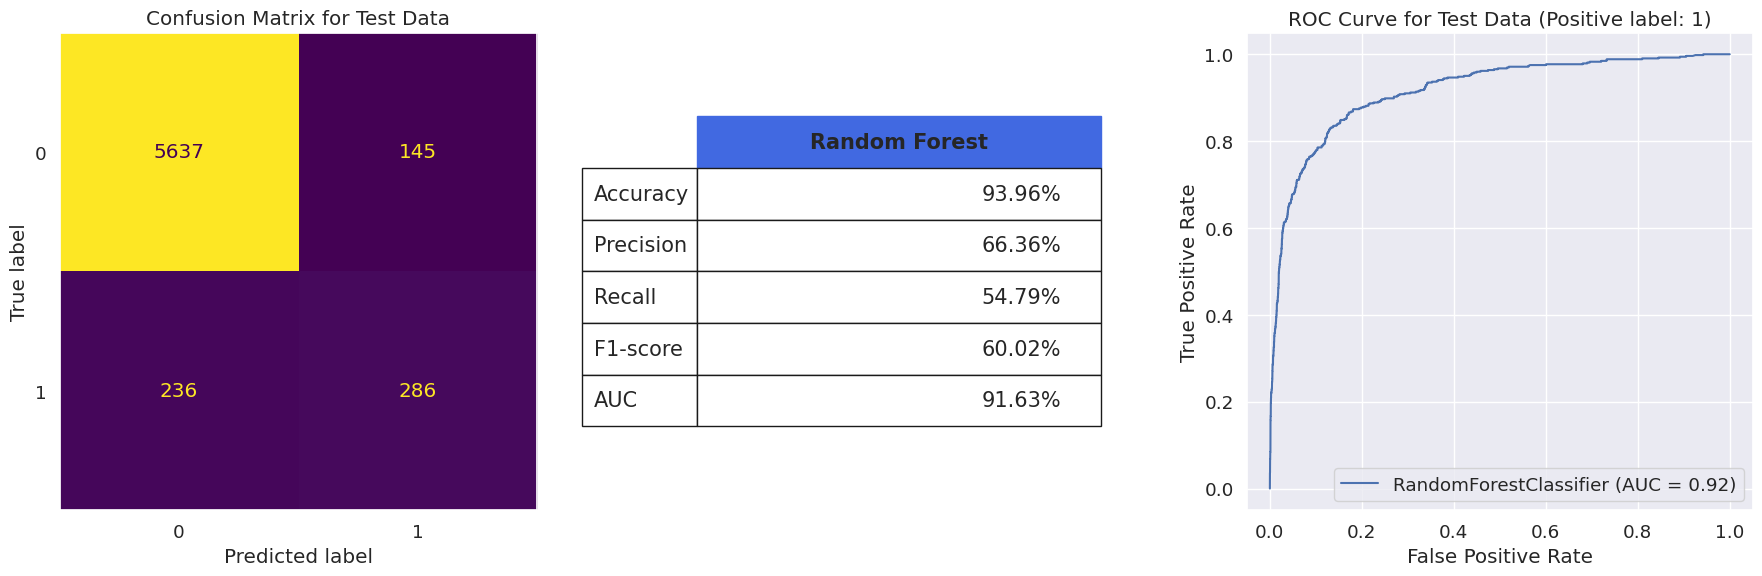

In [ ]:
model_evaluation(rf_final, X_train, X_test, y_train, y_test, 'Random Forest')

In [ ]:
# Save the final performance of Random Forest classifier
rf_result = metrics_calculator(rf_final, X_test, y_test, 'Random Forest')

### Model 5.  Gradient Boosting

In [ ]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
# Initialize the Gradient Boosting Classifier
gbc_final = GradientBoostingClassifier(max_features=None, loss='deviance', criterion='friedman_mse',
                                 learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0,
                                 min_samples_leaf=4, min_samples_split=2, random_state=0)

# Train the final AdaBoost classifier
gbc_final.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, loss='deviance', max_depth=5,
                           min_samples_leaf=4, random_state=0)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13492
           1       0.99      0.87      0.92      1217

    accuracy                           0.99     14709
   macro avg       0.99      0.93      0.96     14709
weighted avg       0.99      0.99      0.99     14709


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5782
           1       0.62      0.50      0.56       522

    accuracy                           0.93      6304
   macro avg       0.79      0.74      0.76      6304
weighted avg       0.93      0.93      0.93      6304



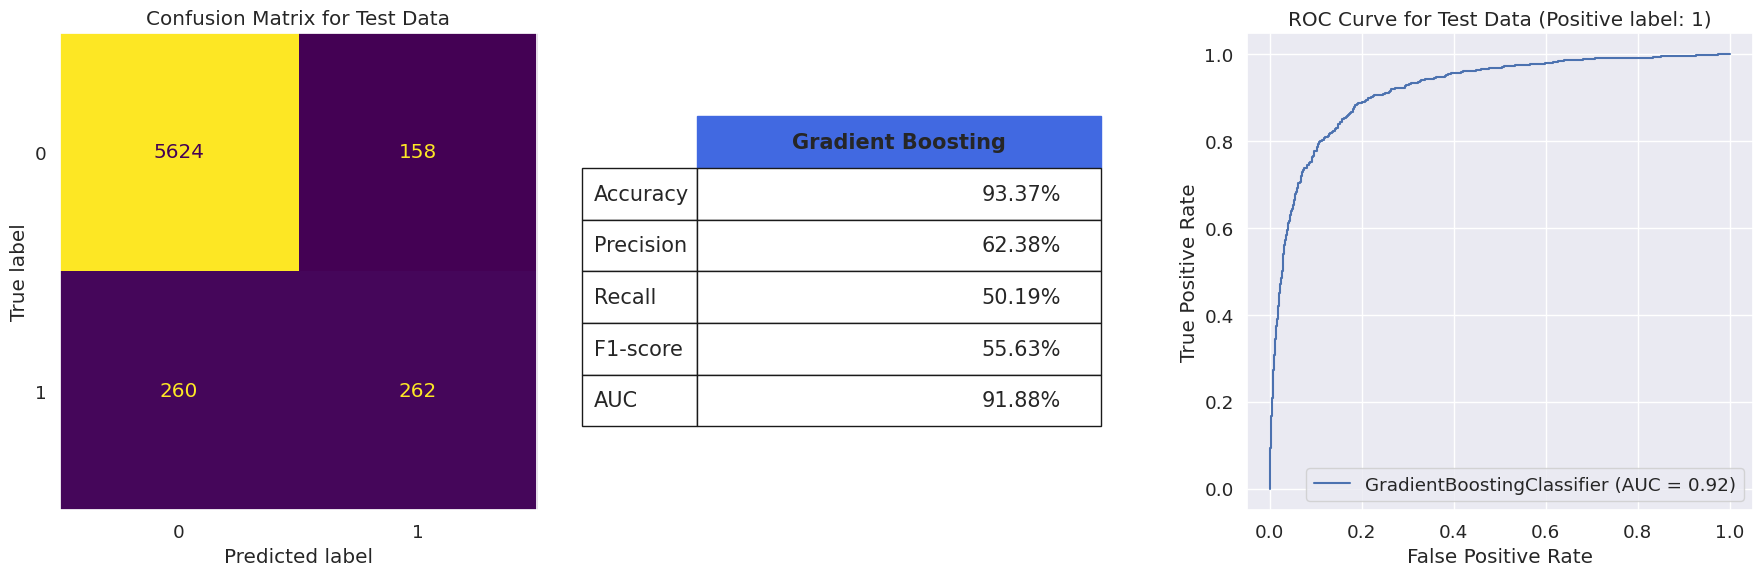

In [ ]:
model_evaluation(gbc_final, X_train, X_test, y_train, y_test, 'Gradient Boosting')

In [ ]:
# Save the final performance of Gradient Boosting classifier
gbc_result = metrics_calculator(gbc_final, X_test, y_test, 'Gradient Boosting')

### Model 6. XGBoost Classifier

In [ ]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Initialize the XGBoost Classifier
xgb_final = XGBClassifier(max_depth=7,
                          learning_rate=0.3,
                          n_estimators=300,
                          min_child_weight=1,
                          scale_pos_weight=1.5,
                          colsample_bytree=0.8,
                          gamma=0.1,
                          booster='gbtree',
                          objective='binary:logistic',
                          eval_metric='error',
                          random_state=0)

# Train the XGBoost Classifier
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13492
           1       1.00      1.00      1.00      1217

    accuracy                           1.00     14709
   macro avg       1.00      1.00      1.00     14709
weighted avg       1.00      1.00      1.00     14709


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5782
           1       0.66      0.52      0.58       522

    accuracy                           0.94      6304
   macro avg       0.81      0.75      0.77      6304
weighted avg       0.93      0.94      0.93      6304



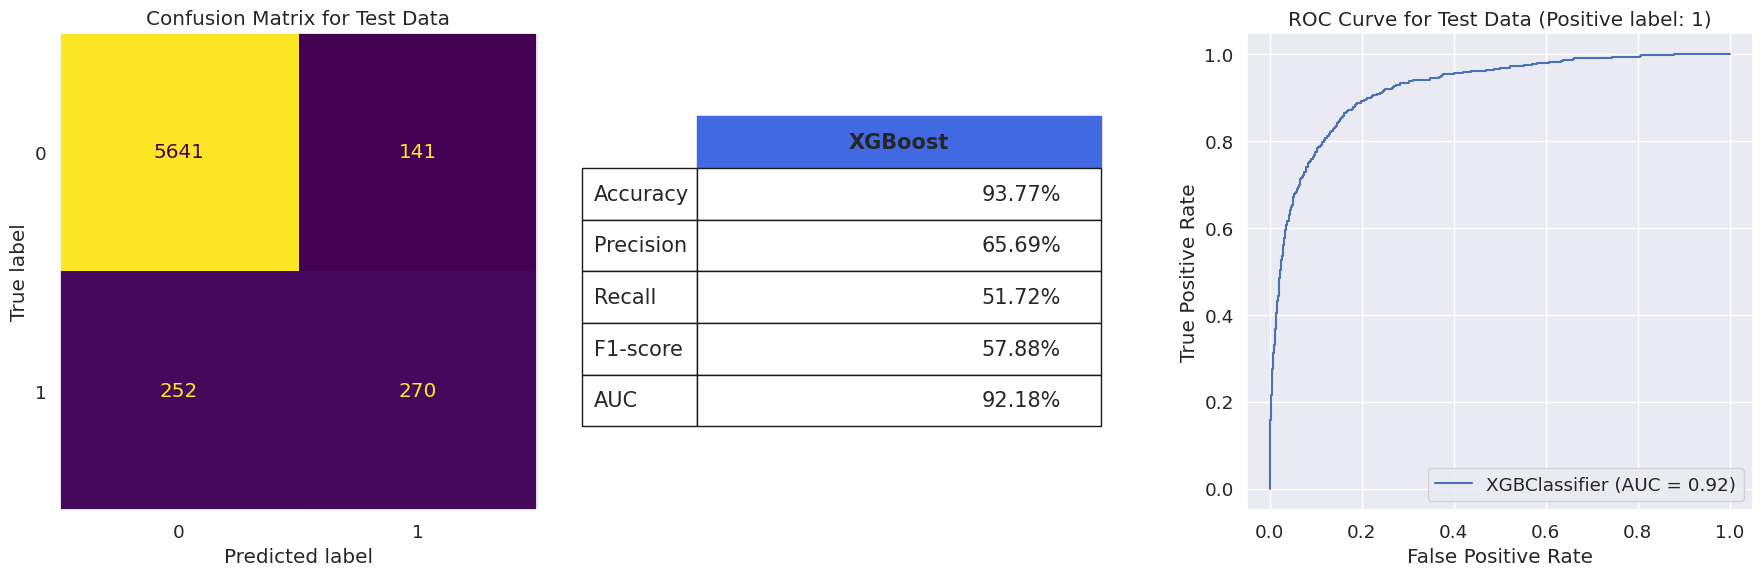

In [ ]:
model_evaluation(xgb_final, X_train, X_test, y_train, y_test, 'XGBoost')

In [ ]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(xgb_final, X_test, y_test, 'XGBoost')

### Conclusion

In [ ]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([logreg_rfe_smote_result,
                     logreg_pca_smote_result,
                     logreg_cw_result,
                     rf_result,
                     gbc_result,
                     xgb_result], axis=1).T

# Sort the dataframe in descending order based on F1-score values
results.sort_values(by='Accuracy', ascending=False, inplace=True)

# Color the F1-score column
results.style.applymap(lambda x: 'background-color: royalblue', subset='Accuracy')

,Accuracy,Precision,Recall,F1-score,AUC
Random Forest,93.96%,66.36%,54.79%,60.02%,91.63%
XGBoost,93.77%,65.69%,51.72%,57.88%,92.18%
Gradient Boosting,93.37%,62.38%,50.19%,55.63%,91.88%
Logistic Regression - Class Weights,92.91%,61.54%,38.31%,47.23%,89.68%
Logistic Regression - RFE + SMOTE,82.49%,29.9%,82.95%,43.96%,89.01%
Logistic Regression - PCA + SMOTE,78.25%,24.6%,78.74%,37.48%,84.78%


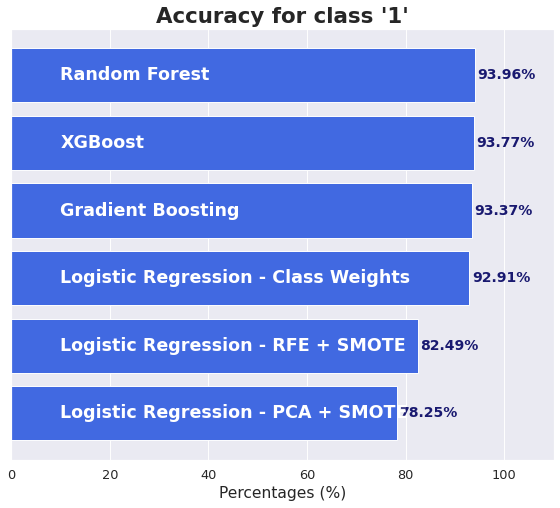

In [ ]:
# Prepare values
results.sort_values(by='Accuracy', ascending=True, inplace=True)
f1_scores = results['Accuracy'].str.strip('%').astype(float)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(10, 8), dpi=70)
ax.barh(results.index, f1_scores, color='royalblue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='midnightblue')
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=18)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0,110])

# Add title and xlabel
plt.title("Accuracy for class '1'", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [ ]:
unseen_df=pd.read_csv('test.csv')
unseen_df.shape